# The main notebook for presentation 
Go to https://tensorboard.dev/experiment/gnqkIPl7QTKn3Yqqz2wnHw/#scalars for visualising the performance metrics of various models

    Small description for models on the tensorboard
    1. "mnist,bs=250" refers to original unablated model
    2. "mnist,bs=250,skip_prototypes" refers to model with the prototype layer in the prototype classification layer replaced with a simple feed forward network.
## First we load the trained model

In [42]:
from models import ProtoTypeDL
import torch
class args:
    skip_proto_layer=0
    skip_decode=0
model=ProtoTypeDL(args,10).cuda()
model.load_state_dict(torch.load("Models/mnist_bs250"))

<All keys matched successfully>

## Now we load the prototypes that we have learnt

In [43]:
protos=model.proto_classifier.prototypes


## Now we pass the learnt prototypes to the decoder so that we can visualise the prototype images

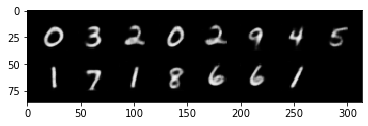

In [44]:
# protos.type()
protos=protos.view(15,10,2,2)
decoded=model.ae_layer.decode(protos)
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

show(make_grid(decoded.cpu(),padding=10))

### Here we visualise the Fully connected layer of the prototype classification layer which transforms $\mathbb{R}^m \rightarrow \mathbb{R}^k$ where $m$ is the number of prototype vectors and $k$ is the number of final classes.
The rows in the below table are in the same order as the images shown above.

In [45]:
import pandas as pd
df=pd.DataFrame(model.proto_classifier.weights_project.weight.t().detach().cpu().numpy())
import seaborn as sns
cm = sns.dark_palette("lightgreen", as_cmap=True,n_colors=1)
s = df.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9
0,-4.008438,0.849973,0.178041,0.249836,0.187275,-0.501686,0.827781,-0.570622,-0.125787,0.639832
1,0.114539,0.536442,0.695880,-4.394160,1.786373,-0.727455,0.326947,0.585770,0.436472,0.003827
2,0.329187,0.641768,-3.483248,-0.556856,0.635603,0.828238,-0.179308,0.874449,-0.399527,0.557310
3,-3.691901,1.000681,0.703147,0.815481,-0.515513,-0.351338,-0.596965,0.425457,0.143451,0.654994
4,0.055363,-0.142943,-2.639148,-0.295991,0.960066,1.498302,0.001044,-1.403601,0.915176,0.352949
5,0.693734,1.016218,1.160842,0.275272,-0.831552,0.576152,1.236066,0.383568,0.214666,-4.808922
6,1.036314,-0.021292,0.576341,1.220626,-5.023773,0.413618,0.139152,0.134052,0.985308,-0.519368
7,0.561755,0.676749,1.370022,-0.443099,0.172519,-4.682354,0.227234,1.278389,0.778383,0.294606
8,1.096560,-2.807292,0.905432,-1.271377,0.875366,-0.028941,0.770360,-0.335095,0.908170,-0.263184
9,-0.116612,0.843814,0.314517,0.404737,0.183780,1.044216,1.421944,-4.762935,0.988356,-0.592029


## Here we visualise few examples of Elastic Deformation which was used by the authors for implicit regularisation
### First retrieve  5 images 

In [48]:
import pandas as pd
x=pd.read_csv("Data/mnist_test.csv",delimiter=",")
a=torch.tensor(x.iloc[:5,1:].values.reshape(-1,1,28,28)).float()

### The following shows those 5 as it is

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


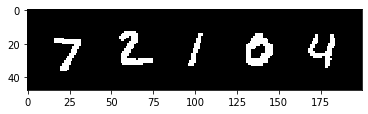

In [49]:
show(make_grid(a,padding=10))

### Now we deform these and then visualise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


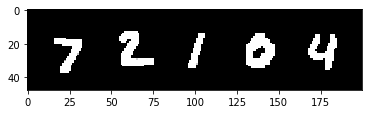

In [54]:
import utils
utils.ElasticDeformation.initialize()
c=utils.ElasticDeformation.getElasticDeformation(a.cuda())
show(make_grid(c.cpu(),padding=10))
